In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
houses = pd.read_csv('Casas_venezuela.csv')
apartments = pd.read_csv('Departamentos_venezuela.csv')

In [8]:
houses.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Terreno,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,360.000,360.000,360.000,360.000,360.000,360.000,306.000,360.000
mean,156816.861,1131.361,759.472,4.197,3.969,3.544,3.840,0.419
std,208535.098,6245.014,5012.374,1.536,1.914,1.657,2.559,0.696
min,160.000,41.000,2.000,1.000,1.000,0.000,0.000,0.000
25%,32000.000,176.000,172.000,3.000,3.000,2.000,2.000,0.000
50%,85000.000,300.000,330.000,4.000,4.000,3.000,3.000,0.000
75%,191250.000,450.000,568.250,5.000,5.000,4.000,5.000,1.000
max,1800000.000,95000.000,95000.000,13.000,14.000,11.000,20.000,6.000


In [9]:
apartments.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,360.000,360.000,360.000,360.000,360.000,360.000,360.000
mean,97988.417,302.967,2.644,2.539,2.292,1.711,0.242
std,153378.704,1641.523,0.957,1.290,1.027,1.314,0.478
min,120.000,35.000,1.000,1.000,0.000,0.000,0.000
25%,22000.000,78.000,2.000,2.000,2.000,1.000,0.000
50%,50000.000,102.000,3.000,2.000,2.000,2.000,0.000
75%,115000.000,143.250,3.000,3.000,3.000,2.000,0.000
max,1700000.000,27190.000,6.000,9.000,7.000,18.000,2.000


In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      360 non-null    int64  
 1   Codígo RAH                  360 non-null    object 
 2   Tipo de Propiedad           360 non-null    object 
 3   Estilo                      360 non-null    object 
 4   Área Privada                360 non-null    int64  
 5   Terreno                     360 non-null    int64  
 6   Estado Del Inmueble         360 non-null    object 
 7   Dormitorios                 360 non-null    int64  
 8   Total Baños                 360 non-null    int64  
 9   Baños Completos             360 non-null    int64  
 10  Tipo De Estacionamiento     360 non-null    object 
 11  Puestos De Estacionamiento  306 non-null    float64
 12  Amoblado                    360 non-null    object 
 13  Dormitorio De Servicio      360 non

In [11]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      360 non-null    int64  
 1   Codígo RAH                  360 non-null    object 
 2   Tipo de Propiedad           360 non-null    object 
 3   Estilo                      360 non-null    object 
 4   Área Privada                360 non-null    int64  
 5   Estado Del Inmueble         360 non-null    object 
 6   Dormitorios                 360 non-null    int64  
 7   Total Baños                 360 non-null    int64  
 8   Baños Completos             360 non-null    int64  
 9   Tipo De Estacionamiento     360 non-null    object 
 10  Puestos De Estacionamiento  360 non-null    int64  
 11  Amoblado                    360 non-null    object 
 12  Dormitorio De Servicio      360 non-null    object 
 13  País                        360 non

In [31]:
houses_numeric_features = [col for col in houses.columns if houses[col].dtype != 'object']
apartments_numeric_features = [col for col in apartments.columns if apartments[col].dtype != 'object']

In [82]:
houses_numeric_features

['Precio',
 'Área Privada',
 'Terreno',
 'Dormitorios',
 'Total Baños',
 'Baños Completos',
 'Puestos De Estacionamiento',
 'Medios Baños']

In [90]:
def graph_numeric_features(df, features):
    for col in features:
        fig, ax = plt.subplots(2, 1, figsize=(9,6))
        
        try:
            feature = df[col].astype(int)
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
        
        ax[0].hist(feature, bins=50, edgecolor = "black")
        ax[0].ticklabel_format(style='plain')
        ax[0].axvline(feature.median(), color='red', linestyle='dashed', linewidth=2, label='Mediana')
        ax[0].axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2, label='Media')
        ax[0].legend()
        
        ax[1].boxplot(feature, vert = False, medianprops = { 'color':'red' })
        ax[1].get_xaxis().get_major_formatter().set_scientific(False)

        fig.suptitle(col)
    plt.show()

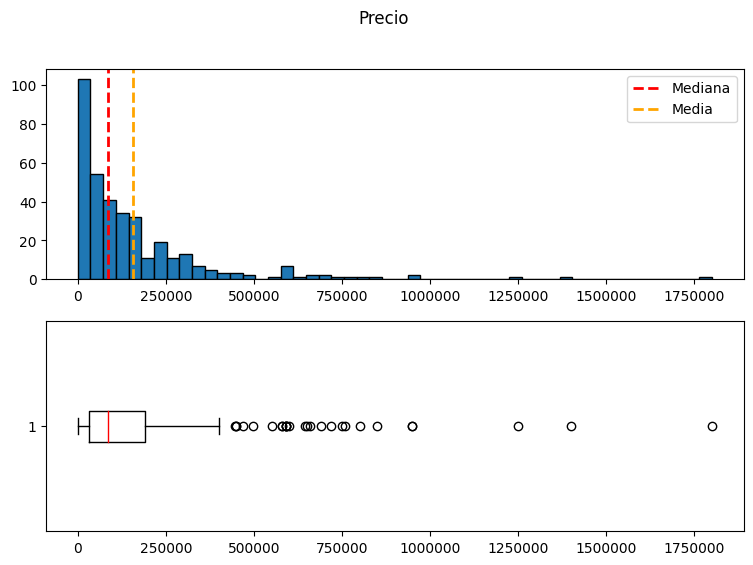

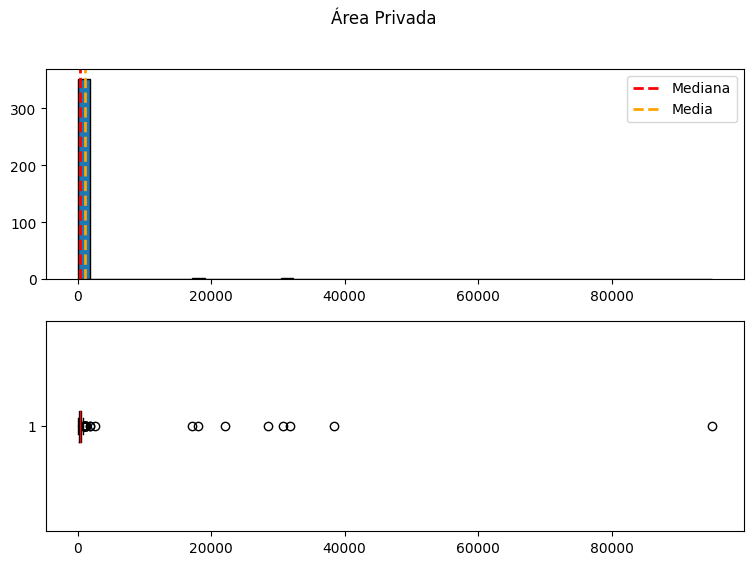

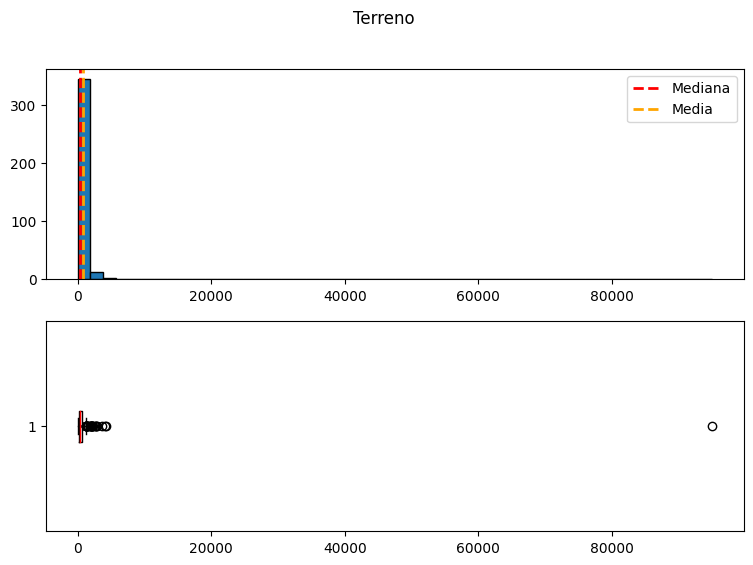

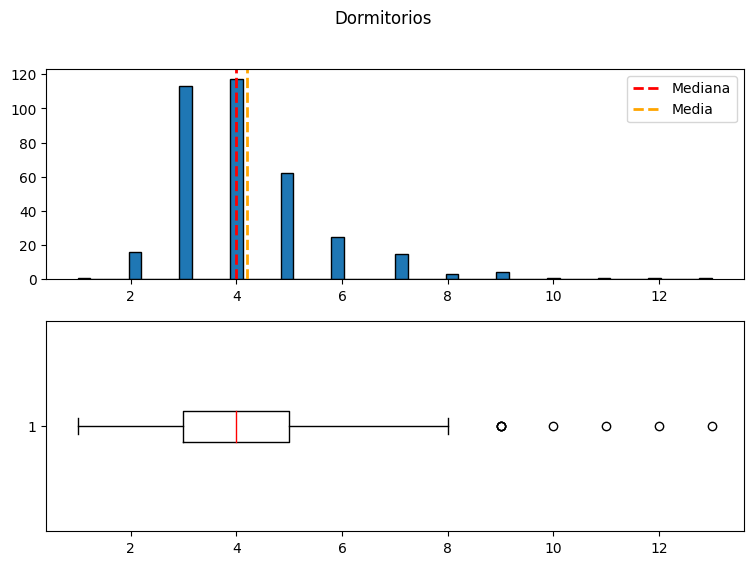

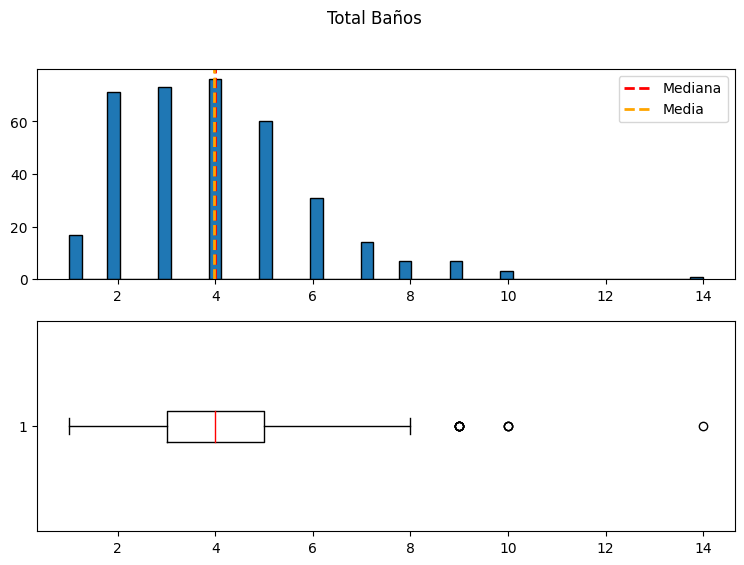

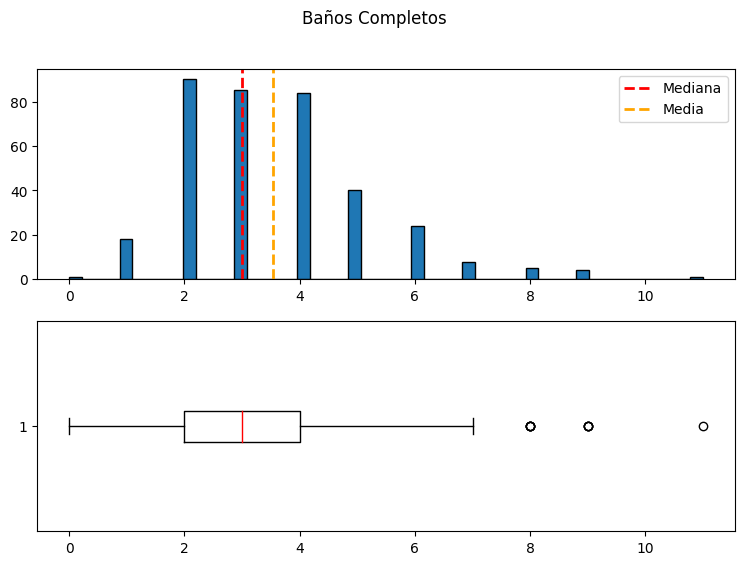

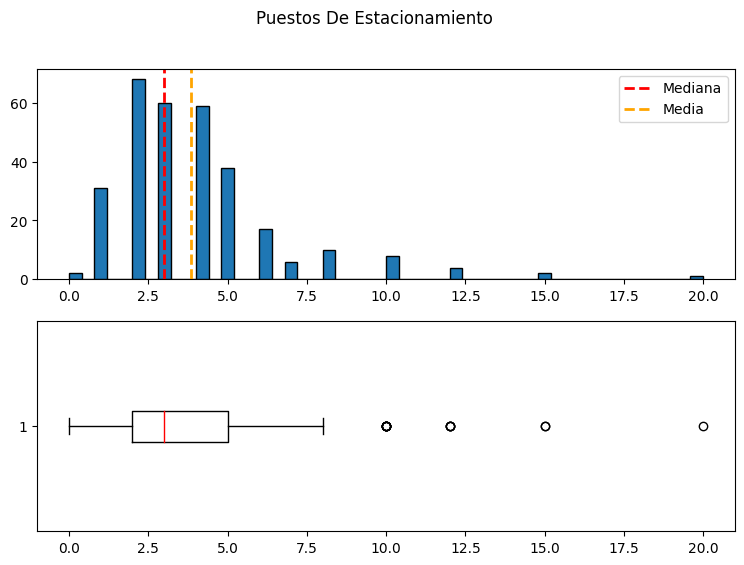

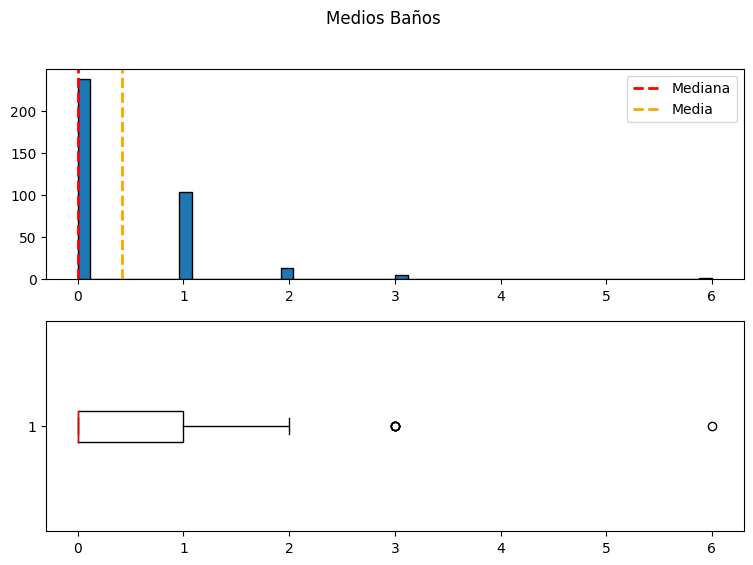

In [91]:
graph_numeric_features(houses, houses_numeric_features)

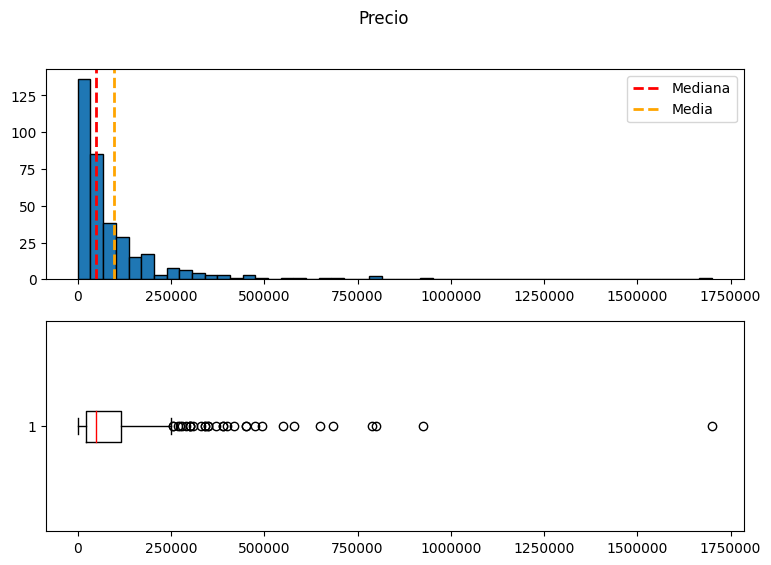

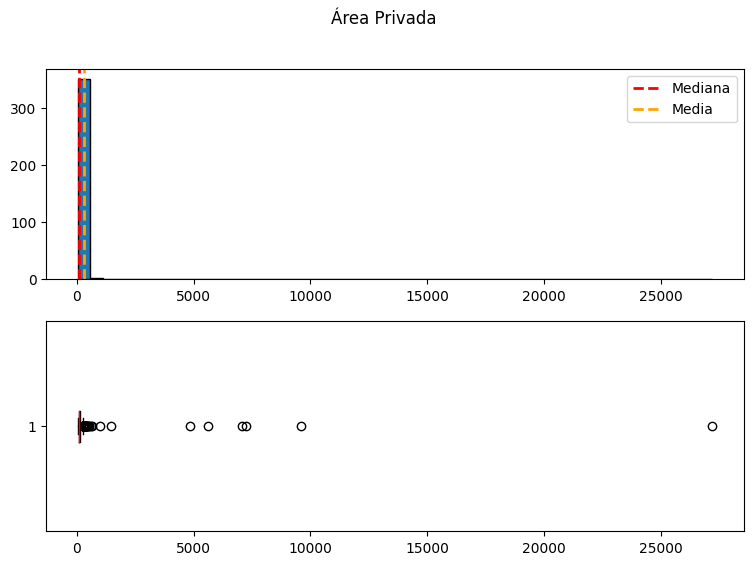

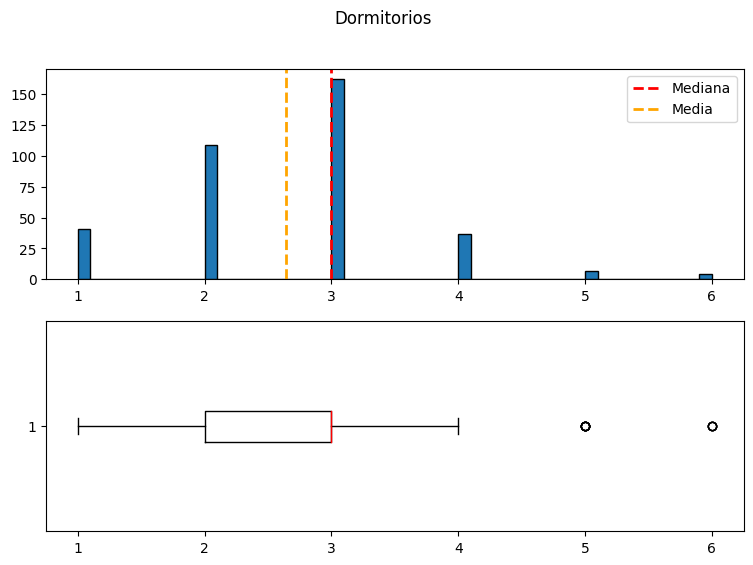

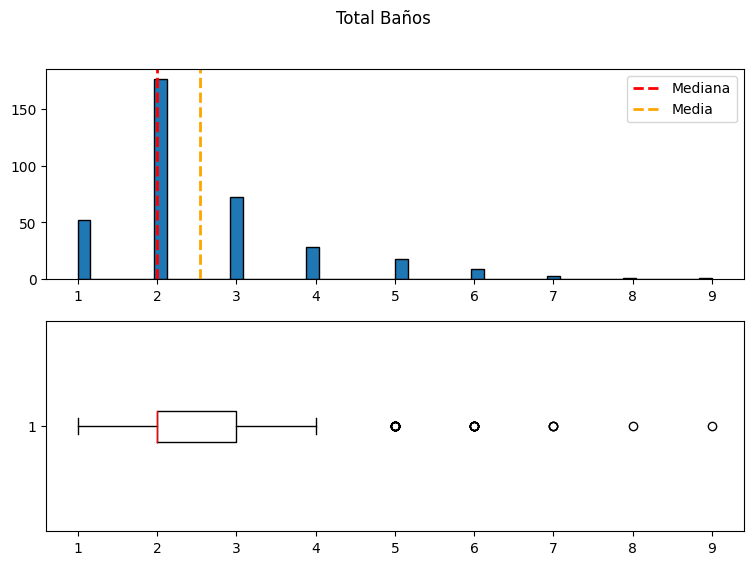

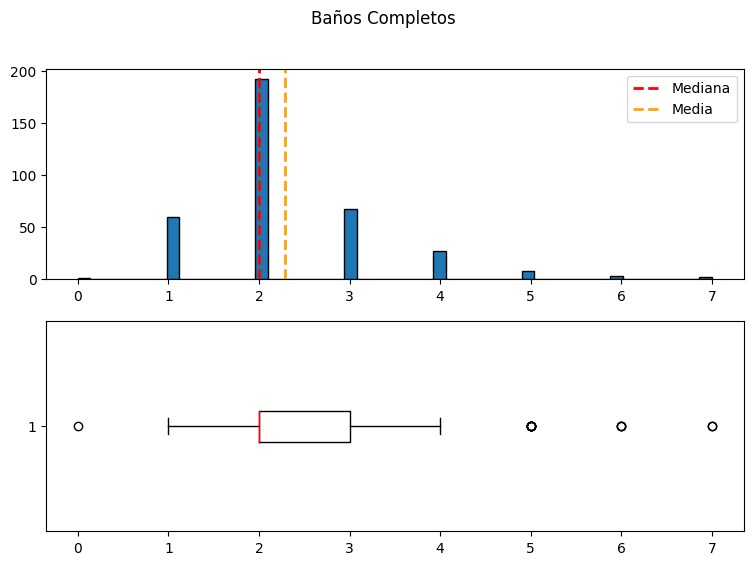

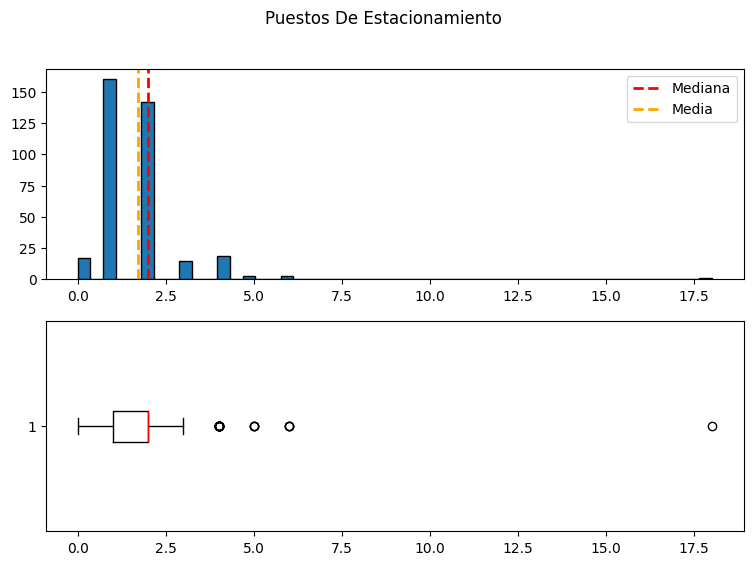

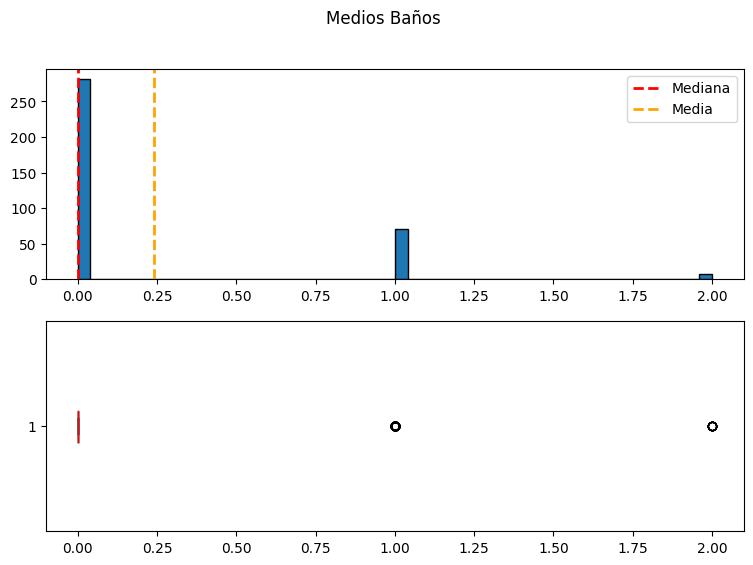

In [92]:
graph_numeric_features(apartments, apartments_numeric_features)